### <font color='aqua'> Let's start off with reading the Commander CMB map through the full code, not the function. <blue>

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import healpy as hp
import astropy as ap
from scipy import stats

from helper_funcs import mask_map, plot_ps, smooth_map, find_stats, downsize_map, compute_cl

In [ ]:
com_map = hp.read_map("cmb_maps/commander_CMB_map.fits")

0.0 180.0 -180.0 180.0


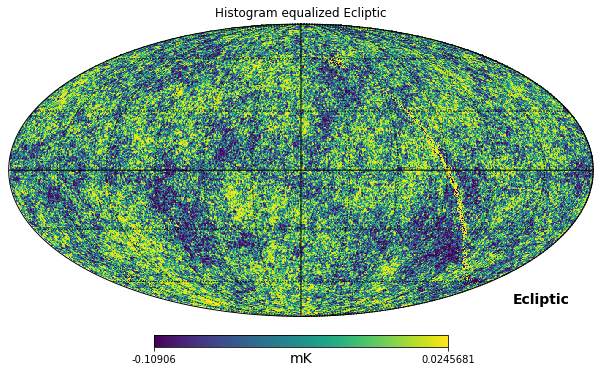

In [ ]:
hp.mollview(
        com_map,
        coord=["G", "E"],
        title="Histogram equalized Ecliptic",
        unit="mK",
        norm="hist",
        )
hp.graticule()

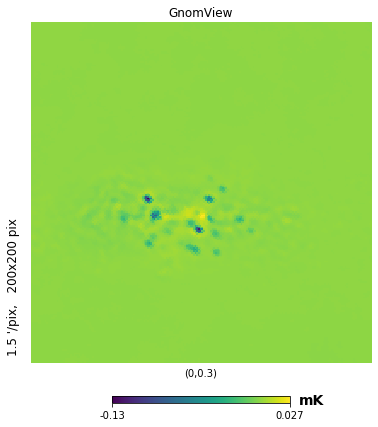

In [ ]:
hp.gnomview(com_map, rot=[0, 0.3], title="GnomView", unit="mK", format="%.2g")

In [ ]:
mask = hp.read_map(mask_apo0).astype(np.bool_)
com_map_masked = hp.ma(com_map)
com_map_masked.mask = np.logical_not(mask)

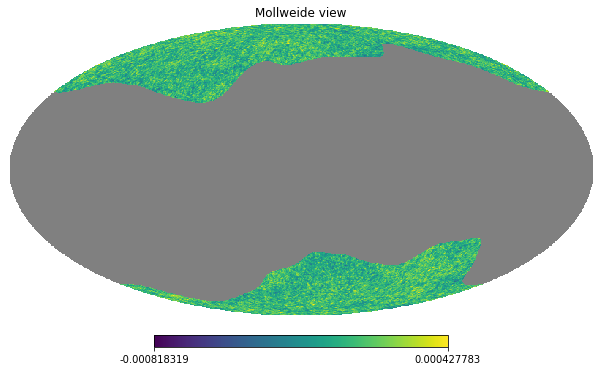

In [ ]:
hp.mollview(com_map_masked.filled())

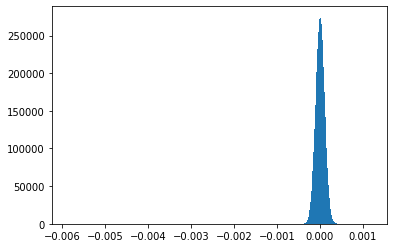

In [ ]:
plt.hist(com_map_masked.compressed(), bins=1000);

In [ ]:
LMAX = 1024
cl = hp.anafast(com_map_masked.filled(), lmax=LMAX)
ell = np.arange(len(cl))

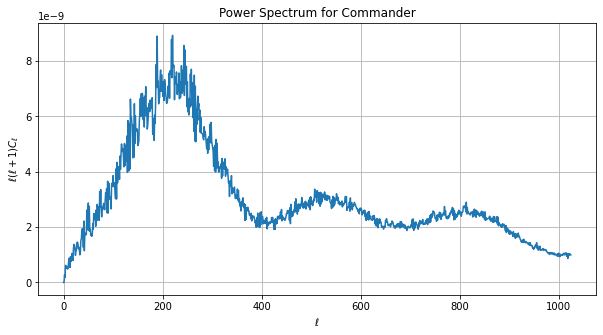

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(ell, ell * (ell + 1) * cl)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)C_{\ell}$")
plt.title("Power Spectrum")
plt.grid()

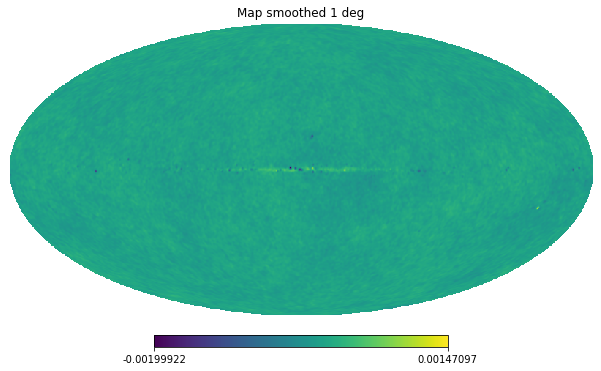

In [ ]:
com_map_smoothed = hp.smoothing(com_map, fwhm=np.radians(1.))
hp.mollview(com_map_smoothed, title="Map smoothed 1 deg")